### Importando bibliotecas

In [4]:
import pandas as pd

### Obtendo os dados 

In [5]:
train_url = "https://raw.githubusercontent.com/pedropmtf/titanic/master/train.csv"
test_url  = "https://raw.githubusercontent.com/pedropmtf/titanic/master/test.csv"
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

### Juntando os datasets 



In [6]:
test['Survived'] = 0
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [7]:
test_ordenado = test[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked']]
test = test_ordenado

In [8]:
frames = [train, test]
data = pd.concat(frames)

### Conhecendo os dados 

In [9]:
len(data.columns)

12

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.261268,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.439494,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
data.Name.value_counts()

Kelly, Mr. James                   2
Connolly, Miss. Kate               2
Wirz, Mr. Albert                   1
Ringhini, Mr. Sante                1
Pettersson, Miss. Ellen Natalia    1
                                  ..
Ridsdale, Miss. Lucy               1
Krekorian, Mr. Neshan              1
Hays, Mr. Charles Melville         1
Mudd, Mr. Thomas Charles           1
Conlon, Mr. Thomas Henry           1
Name: Name, Length: 1307, dtype: int64

In [13]:
data.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [14]:
data.Ticket.value_counts()

CA. 2343         11
1601              8
CA 2144           8
347082            7
347077            7
                 ..
SC/PARIS 2147     1
237798            1
347083            1
PC 17482          1
2629              1
Name: Ticket, Length: 929, dtype: int64

In [15]:
data.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
F4                 4
                  ..
C99                1
A20                1
A9                 1
D11                1
D48                1
Name: Cabin, Length: 186, dtype: int64

In [16]:
data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

### Consultando e eliminando na 

In [17]:
data.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
age_media = data['Age'].mean()
data['Age'] = data['Age'].fillna(age_media)
embarked_moda = data['Embarked'].mode
data['Embarked'] = data['Embarked'].fillna(str(embarked_moda))
fare_media = data['Fare'].mean()
data['Fare'] = data['Fare'].fillna(fare_media)
data = data.drop(columns =['Cabin'])
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Feature Engineering 

Transformando a coluna "Sexo" em dummy

In [77]:
for i in data['Sex']:
    if i == 'male':
        data['Mulher'][i] = 0
    if i == 'female':
        data['Mulher'][i] = 1

C:\Users\Bia\Anaconda2\envs\opencv-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Transfomando a coluna titulos em numeros

In [85]:
data['Titulo'] = data['Titulo'].astype('category')
data['titulo_cat'] = data['Titulo'].cat.codes

Criando a coluna "Tamanho da familia"

In [19]:
data['Tam_familia'] = data['SibSp'] + data['Parch']

Separando a coluna "nome" em 3

In [20]:
data[['Sobrenome', 'Resto']] = data.Name.str.split(', ', expand = True)
data[['Titulo', 'Primeiro_nome', 'sei_la']] = data['Resto'].str.split('.', expand= True)
data_ord = data[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
                 'Parch', 'Ticket', 'Fare', 'Embarked', 'Tam_familia', 'Sobrenome',
                 'Titulo', 'Primeiro_nome']]
data = data_ord

In [27]:
data.Titulo.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
the Countess      1
Dona              1
Mme               1
Sir               1
Lady              1
Capt              1
Don               1
Name: Titulo, dtype: int64

In [28]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Tam_familia
PassengerId,1.000000,-0.331493,-0.038354,0.025731,-0.055224,0.008942,0.031416,-0.031437
Survived,-0.331493,1.000000,-0.244686,-0.060203,-0.014375,0.054908,0.173630,0.020555
Pclass,-0.038354,-0.244686,1.000000,-0.366371,0.060832,0.018322,-0.558477,0.050027
Age,0.025731,-0.060203,-0.366371,1.000000,-0.190747,-0.130872,0.171521,-0.196996
SibSp,-0.055224,-0.014375,0.060832,-0.190747,1.000000,0.373587,0.160224,0.861952
Parch,0.008942,0.054908,0.018322,-0.130872,0.373587,1.000000,0.221522,0.792296
Fare,0.031416,0.173630,-0.558477,0.171521,0.160224,0.221522,1.000000,0.226465
Tam_familia,-0.031437,0.020555,0.050027,-0.196996,0.861952,0.792296,0.226465,1.000000


# Visualização de dados 

In [22]:
import seaborn as sns

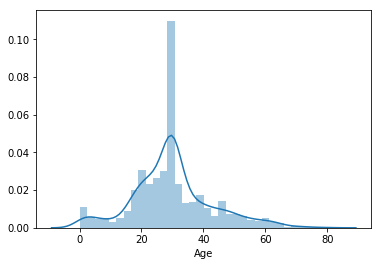

In [23]:
sns.distplot(data['Age'])


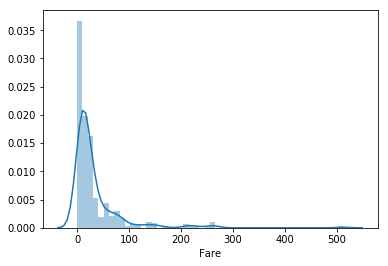

In [24]:
sns.distplot(data['Fare'])

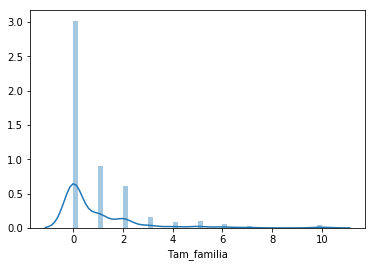

In [25]:
sns.distplot(data['Tam_familia'])

In [26]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Tam_familia', 'Sobrenome', 'Titulo',
       'Primeiro_nome'],
      dtype='object')

# Feature Selection

In [168]:
train = data[:890]
test = data[891:]

In [98]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Tam_familia', 'Sobrenome', 'Titulo',
       'Primeiro_nome', 'Mulher', 'titulo_cat'],
      dtype='object')

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train = train[['Pclass','Mulher', 'Age', 'Fare', 'Tam_familia', 'titulo_cat']]
y_train = train['Survived']


x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2,)




x_final = test[['Pclass','Mulher', 'Age', 'Fare', 'Tam_familia', 'titulo_cat']]
y_final = test['Survived']

In [89]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = (0.8 * (1 - 0.8)))
sel.fit_transform(x_train)

array([[ 3.        ,  0.        , 22.        ,  7.25      ,  1.        ,
        12.        ],
       [ 1.        ,  1.        , 38.        , 71.2833    ,  1.        ,
        13.        ],
       [ 3.        ,  1.        , 26.        ,  7.925     ,  0.        ,
         9.        ],
       ...,
       [ 1.        ,  1.        , 19.        , 30.        ,  0.        ,
         9.        ],
       [ 3.        ,  1.        , 29.88113767, 23.45      ,  3.        ,
         9.        ],
       [ 1.        ,  0.        , 26.        , 30.        ,  0.        ,
        12.        ]])

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x_new_best = SelectKBest(chi2, k=2).fit_transform(x_train, y_train)

In [96]:
x_new_best

array([[ 0.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 1.    ,  7.925 ],
       ...,
       [ 1.    , 30.    ],
       [ 1.    , 23.45  ],
       [ 0.    , 30.    ]])

# Aplicando algoritmos de machine learning

### Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
logref_clf = LogisticRegression()
logref_clf.fit(x_train, y_train)
logreg_prediction = logref_clf.predict(x_test)

In [179]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### K-Nearestneighbors

In [184]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(x_train, y_train)
KNN_prediction = KNN_model.predict(x_test)

### SVC

In [185]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(x_train, y_train)
SVC_prediction = SVC_model.predict(x_test)

C:\Users\Bia\Anaconda2\envs\opencv-env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [203]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(accuracy_score(logreg_prediction, y_test))
print(confusion_matrix(logreg_prediction, y_test))
print(classification_report(logreg_prediction, y_test))
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))

0.7808988764044944
[[86 23]
 [16 53]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       109
           1       0.70      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178

0.6853932584269663
0.6123595505617978


# Escrevendo o arquivo final 

In [134]:
y_final = logref_clf.predict(x_final)

In [170]:
arq_final = pd.DataFrame(test['PassengerId'])
arq_final['Survived'] = y_final
arq_final.to_csv('arquivo_final.csv', index = False)